In [1]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [2]:
type(2.0j)

complex

In [3]:
from qiskit.visualization import plot_histogram

In [4]:
v.draw('latex')

<IPython.core.display.Latex object>

In [5]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

## Wigner's friend


In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(1, name = 'System qubit')
qr2 = QuantumRegister(1, name = "Wigner's friend")
cr1 = ClassicalRegister(1, name = "Wigner's friend outcome")

qc = QuantumCircuit(qr1,qr2,cr1)
qc.h(0)  # H gate will initially map a qubit to a |+> state
qc.cx(0,1)
qc.measure(1,0)
qc.draw()

┌───┐        
             System qubit: ┤ H ├──■─────
                           └───┘┌─┴─┐┌─┐
          Wigner's friend: ─────┤ X ├┤M├
                                └───┘└╥┘
Wigner's friend outcome: 1/═══════════╩═
                                      0

Count:  {'1': 514, '0': 510}


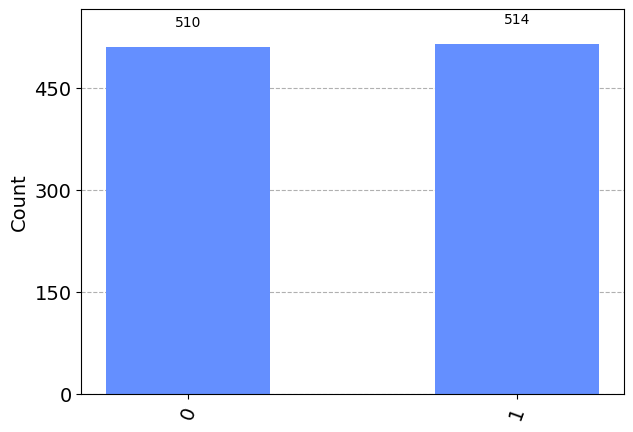

In [7]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

backend = AerSimulator()
result = backend.run(qc).result()

print("Count: ", result.get_counts())
plot_histogram(result.get_counts())

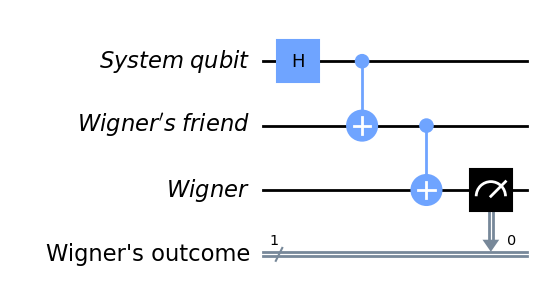

In [9]:
# Now for Wigner's memory as opposed to his friend's memory
qr3 = QuantumRegister(1, name = 'Wigner')
cr2 = ClassicalRegister(1, name = "Wigner's outcome")

qc2 = QuantumCircuit(qr1, qr2, qr3, cr2)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)
qc2.measure(2,0)
qc2.draw('mpl')

Wigner's Counts:  {'0': 477, '1': 523}


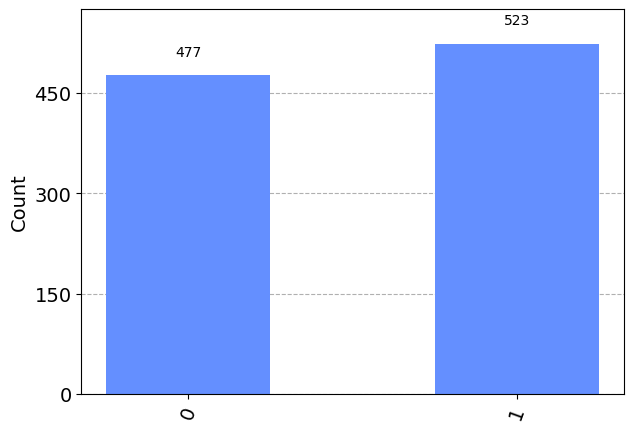

In [10]:
result = backend.run(qc2, shots = 1000).result()

print("Wigner's Counts: ", result.get_counts())
plot_histogram(result.get_counts())

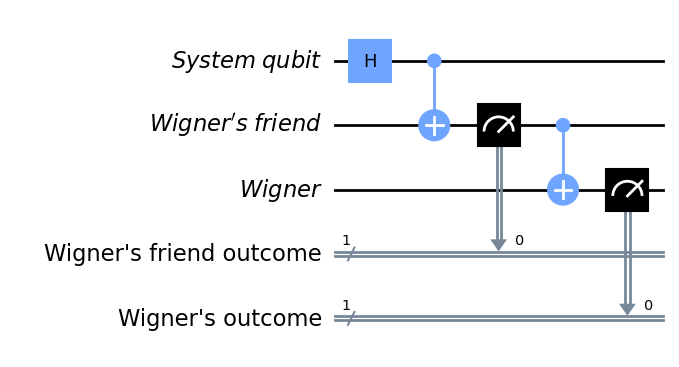

In [11]:
# Full Quantum Circuit from friends perspective:
qc3 = QuantumCircuit(qr1,qr2,qr3,cr1,cr2)
qc3.h(0)
qc3.cx(0,1)
qc3.measure(qr2,cr1)
qc3.cx(1,2)
qc3.measure(qr3,cr2)

qc3.draw('mpl')

In [14]:
result = backend.run(qc3, shots = 1000).result()
print("Wigner's friend counts: ", result.get_counts())

Wigner's friend counts:  {'0 0': 507, '1 1': 493}


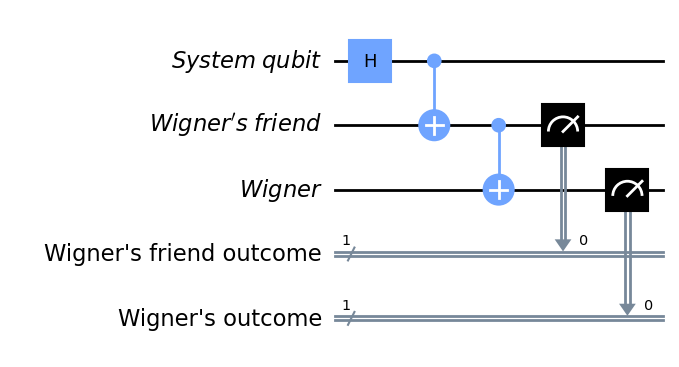

In [12]:
qc4 = QuantumCircuit(qr1,qr2,qr3,cr1,cr2)
qc4.h(0)
qc4.cx(0,1)
qc4.cx(1,2)
qc4.measure(qr2,cr1)
qc4.measure(qr3,cr2)
qc4.draw('mpl')

In [13]:
result = backend.run(qc4, shots = 1000).result()
print("Wigner's counts: ", result.get_counts())

Wigner's counts:  {'0 0': 509, '1 1': 491}
